0.2342799999999987 -0.014099999999999927


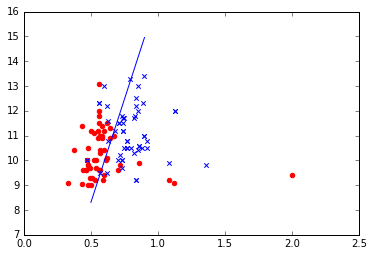

In [1]:
import matplotlib.pyplot as plot
import numpy
import pandas

data = pandas.read_csv('winequality-red.csv', header=None)
#data.tail()

%matplotlib inline

# VARIABLES
e = 0.001
w = [0.0, 0.0]
passes = 110
# DATA
dataTable = data.iloc[:1600, [9, 10, 11]].values
catOne = [row for row in dataTable if row[2] == '4'][:53]
catTwo = [row for row in dataTable if row[2] == '7'][:53]
catAll = []
for (a, b) in zip(catOne, catTwo): 
    catAll.append(a)
    catAll.append(b)
#dftoprint = pandas.DataFrame(catAll)
#dftoprint.to_csv('processed.csv')
# GRAPH
plot.scatter([row[0] for row in catOne], 
             [row[1] for row in catOne],
             color='red', marker='o', label='4')
plot.scatter([row[0] for row in catTwo], 
             [row[1] for row in catTwo],
             color='blue', marker='x', label='7')
# MODIFICATION
for i in range(passes):
    count = 0
    for row in catAll:
        prediction = '7' if ((w[0] * float(row[0]) + w[1] * float(row[1])) > 0.0) else '4'
        d = 0
        if (prediction == '7' and row[2] == '4'):
            d = -1.0
        elif (prediction == '4' and row[2] == '7'):
            d = 1.0
        else:
            d = 0.0
        w[0] = w[0] + e * d * float(row[0])
        w[1] = w[1] + e * d * float(row[1])
        count += 1
x = numpy.arange(0.5, 1.0, 0.1)
print(w[0], w[1])
y = eval('(-1 * w[0] / w[1]) * x')
plot.plot(x, y)  
plot.show()